In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Satış verisi ve müşteri verileri:
sales_df= pd.read_csv("satis_verisi_5000.csv")   
customer_df= pd.read_csv("musteri_verisi_5000_utf8.csv")  

Veri Temizleme ve Manipülasyonu 

In [79]:
print("\nSatış Verisi Bilgileri:")
print(sales_df.info())


Satış Verisi Bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    5000 non-null   int64 
 1   tarih         5000 non-null   object
 2   ürün_kodu     5000 non-null   object
 3   ürün_adi      5000 non-null   object
 4   kategori      5000 non-null   object
 5   fiyat         5000 non-null   object
 6   adet          5000 non-null   int64 
 7   toplam_satis  5000 non-null   object
 8   musteri_id    5000 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 351.7+ KB
None


In [80]:
print("Satış Verisi :")
print(sales_df.head())

print("\nSatış Verisi Eksik Değer Sayısı:")
print(sales_df.isnull().sum())

Satış Verisi :
   Unnamed: 0       tarih ürün_kodu    ürün_adi    kategori    fiyat  adet  \
0           0  2023-07-02      P032       Mouse  Elektronik   1207.3    13   
1           1  2024-02-11      P011       Kalem   Kırtasiye   237.14    16   
2           2  2023-03-06      P024  Bilgisayar  Elektronik  1024.29     9   
3           3  2024-04-11      P063       Klima  Elektronik  1477.88     9   
4           4  2024-01-08      P063       Klima  Elektronik   949.43    19   

        toplam_satis  musteri_id  
0            15694.9        9225  
1            3794.24        3955  
2            9218.61        2367  
3  13300920000000000        2869  
4           18039.17        9724  

Satış Verisi Eksik Değer Sayısı:
Unnamed: 0      0
tarih           0
ürün_kodu       0
ürün_adi        0
kategori        0
fiyat           0
adet            0
toplam_satis    0
musteri_id      0
dtype: int64


In [81]:
hatalar_fiyat = sales_df[pd.to_numeric(sales_df['fiyat'], errors='coerce').isnull()]
hatalar_toplam_satis = sales_df[pd.to_numeric(sales_df['toplam_satis'], errors='coerce').isnull()]

# Hatalı satırlar:
print("Fiyat kolonunda hatalı veriler:")
print(hatalar_fiyat)

print("\nToplam Satış kolonunda hatalı veriler:")
print(hatalar_toplam_satis)

Fiyat kolonunda hatalı veriler:
      Unnamed: 0       tarih ürün_kodu    ürün_adi         kategori  \
159          159  2023-10-23      P018     Telefon       Elektronik   
195          195  2023-05-18      P063       Klima       Elektronik   
217          217  2023-03-23      P018     Telefon       Elektronik   
250          250  2023-09-13      P032       Mouse       Elektronik   
485          485  2024-10-30      P010       Çanta            Giyim   
566          566  2024-05-03      P011       Kalem        Kırtasiye   
656          656  2023-12-30      P063       Klima       Elektronik   
726          726  2024-04-11      P011       Kalem        Kırtasiye   
746          746  2024-05-24      P087    Kulaklık       Elektronik   
766          766  2024-09-12      P010       Çanta            Giyim   
770          770  2024-09-30      P010       Çanta            Giyim   
794          794  2022-11-25      P097   Su Şişesi  Mutfak Ürünleri   
1125        1125  2022-12-08      P082      D

In [82]:
for column in ['fiyat', 'toplam_satis']:
    sales_df[column] = pd.to_numeric(sales_df[column], errors='coerce')

# Hatalı değerleri düşürdüm
sales_df_cleaned = sales_df.dropna(subset=['fiyat', 'toplam_satis'])

print(f"Orijinal satır sayısı: {len(sales_df)}")
print(f"Fiyat kolonunda geçerli satır sayısı: {sales_df['fiyat'].notnull().sum()}")
print(f"Toplam_satis kolonunda geçerli satır sayısı: {sales_df['toplam_satis'].notnull().sum()}")
print(f"Temizlenmiş veri seti satır sayısı: {len(sales_df_cleaned)}")

Orijinal satır sayısı: 5000
Fiyat kolonunda geçerli satır sayısı: 4958
Toplam_satis kolonunda geçerli satır sayısı: 4996
Temizlenmiş veri seti satır sayısı: 4958


In [83]:
print(sales_df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4958 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4958 non-null   int64  
 1   tarih         4958 non-null   object 
 2   ürün_kodu     4958 non-null   object 
 3   ürün_adi      4958 non-null   object 
 4   kategori      4958 non-null   object 
 5   fiyat         4958 non-null   float64
 6   adet          4958 non-null   int64  
 7   toplam_satis  4958 non-null   float64
 8   musteri_id    4958 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 387.3+ KB
None


In [84]:
unique_products = sales_df_cleaned['ürün_adi'].nunique()
print(f"Farklı ürün çeşidi sayısı: {unique_products}")

Farklı ürün çeşidi sayısı: 10


In [85]:
unique_product_names = sales_df_cleaned['ürün_adi'].unique()
print(unique_product_names)

['Mouse' 'Kalem' 'Bilgisayar' 'Klima' 'Fırın' 'Defter' 'Çanta' 'Su Şişesi'
 'Kulaklık' 'Telefon']


In [86]:
unique_category_count = sales_df_cleaned['kategori'].nunique()
print(f"Benzersiz kategori sayısı: {unique_category_count}")

Benzersiz kategori sayısı: 5


In [87]:
unique_categories = sales_df_cleaned['kategori'].unique()
print("Kategoriler:")
print(unique_categories)

Kategoriler:
['Elektronik' 'Kırtasiye' 'Ev Aletleri' 'Giyim' 'Mutfak Ürünleri']


In [88]:
print("\nMüşteri Verisi Bilgileri:")
print(customer_df.info())


Müşteri Verisi Bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   musteri_id       5000 non-null   int64  
 1   isim             5000 non-null   object 
 2   cinsiyet         5000 non-null   object 
 3   yas              5000 non-null   int64  
 4   sehir            5000 non-null   object 
 5   harcama_miktari  5000 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 234.5+ KB
None


In [89]:
print("\nMüşteri Verisi :")
print(customer_df.head())

print("\nMüşteri Verisi Eksik Değer Sayısı:")
print(customer_df.isnull().sum())


Müşteri Verisi :
   musteri_id      isim cinsiyet  yas      sehir  harcama_miktari
0        4353  Gülşahin    Kadın   57  Gaziantep          2726.01
1        8374  Yahşikan    Erkek   66  Gaziantep          4754.70
2        3902  Candeniz    Erkek   61      Konya           867.20
3        2080     Gözel    Erkek   64      Adana          2020.97
4        7901   Erdogan    Kadın   63   İstanbul          4334.16

Müşteri Verisi Eksik Değer Sayısı:
musteri_id         0
isim               0
cinsiyet           0
yas                0
sehir              0
harcama_miktari    0
dtype: int64


- IQR yöntemini kullanarak aykırı değerleri belirlemek için bir fonksiyon tanımladım.
- İlgili sütunlarda aykırı değerleri belirledim.
- Her sütunda tespit edilen aykırı değerlerin özetini çıkardım:

In [90]:
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound


musteri_yas_outliers, yas_lower, yas_upper = find_outliers(customer_df, 'yas')
musteri_harcama_outliers, harcama_lower, harcama_upper = find_outliers(customer_df, 'harcama_miktari')
satis_fiyat_outliers, fiyat_lower, fiyat_upper = find_outliers(sales_df_cleaned, 'fiyat')
satis_toplam_outliers, toplam_lower, toplam_upper = find_outliers(sales_df_cleaned, 'toplam_satis')
satis_adet_outliers, adet_lower, adet_upper = find_outliers(sales_df_cleaned, 'adet')

outliers_summary = {
    "musteri_yas_outliers_count": len(musteri_yas_outliers),
    "musteri_harcama_outliers_count": len(musteri_harcama_outliers),
    "satis_fiyat_outliers_count": len(satis_fiyat_outliers),
    "satis_toplam_outliers_count": len(satis_toplam_outliers),
    "satis_adet_outliers_count": len(satis_adet_outliers),
    "yas_bounds": (yas_lower, yas_upper),
    "harcama_bounds": (harcama_lower, harcama_upper),
    "fiyat_bounds": (fiyat_lower, fiyat_upper),
    "toplam_satis_bounds": (toplam_lower, toplam_upper),
    "adet_bounds": (adet_lower, adet_upper)
}

outliers_summary

{'musteri_yas_outliers_count': 0,
 'musteri_harcama_outliers_count': 0,
 'satis_fiyat_outliers_count': 0,
 'satis_toplam_outliers_count': 462,
 'satis_adet_outliers_count': 0,
 'yas_bounds': (-8.0, 96.0),
 'harcama_bounds': (-2407.415, 7514.085),
 'fiyat_bounds': (-744.02125, 2234.5687500000004),
 'toplam_satis_bounds': (-15273.847500000003, 31811.452500000003),
 'adet_bounds': (-10.0, 30.0)}

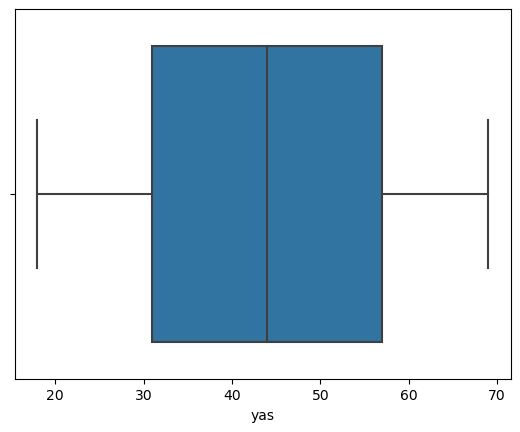

In [91]:
sns.boxplot(data=customer_df, x='yas')
plt.show();

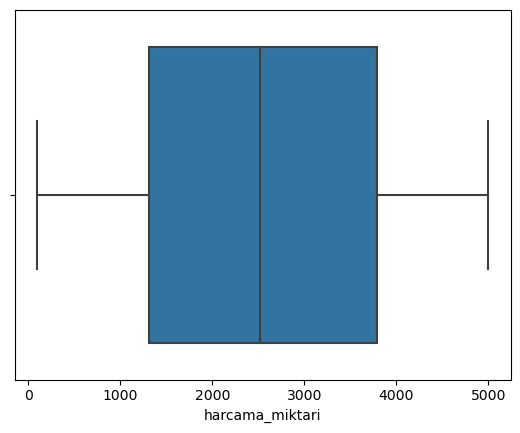

In [92]:
sns.boxplot(data=customer_df, x='harcama_miktari')
plt.show();

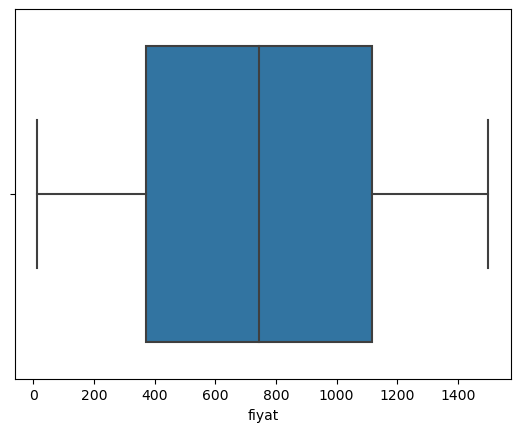

In [93]:
sns.boxplot(data=sales_df_cleaned, x='fiyat')
plt.show();

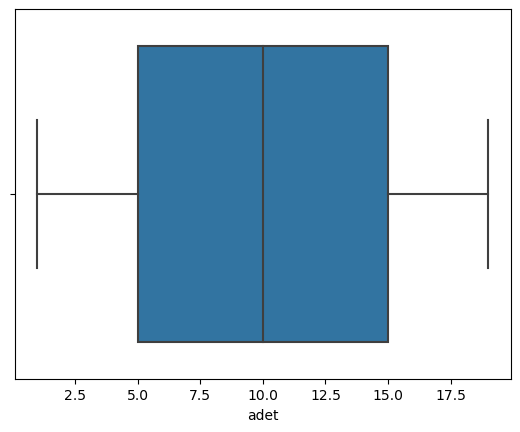

In [94]:
sns.boxplot(data=sales_df_cleaned, x='adet')
plt.show()

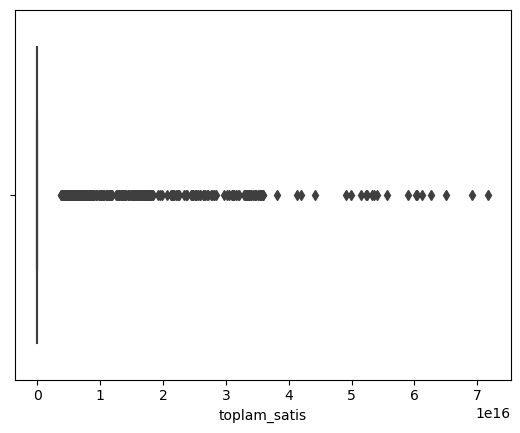

In [95]:
sns.boxplot(data=sales_df_cleaned, x='toplam_satis')
plt.show() 

- Winsorization işlemi için alt ve üst sınırları belirledim:
- Aykırı değerleri belirli bir aralığa çekme (Winsorization) işlemini yaptım:

In [96]:
lower_bound_toplam_satis = toplam_lower  
upper_bound_toplam_satis = toplam_upper  


sales_df_cleaned['toplam_satis'] = sales_df_cleaned['toplam_satis'].apply(
    lambda x: min(max(x, lower_bound_toplam_satis), upper_bound_toplam_satis)
)

sales_df_cleaned.head()

C:\Users\selva\AppData\Local\Temp\ipykernel_19796\3189390700.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df_cleaned['toplam_satis'] = sales_df_cleaned['toplam_satis'].apply(


,Unnamed: 0,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis,musteri_id
0,0,2023-07-02,P032,Mouse,Elektronik,1207.30,13,15694.9000,9225
1,1,2024-02-11,P011,Kalem,Kırtasiye,237.14,16,3794.2400,3955
2,2,2023-03-06,P024,Bilgisayar,Elektronik,1024.29,9,9218.6100,2367
3,3,2024-04-11,P063,Klima,Elektronik,1477.88,9,31811.4525,2869
4,4,2024-01-08,P063,Klima,Elektronik,949.43,19,18039.1700,9724


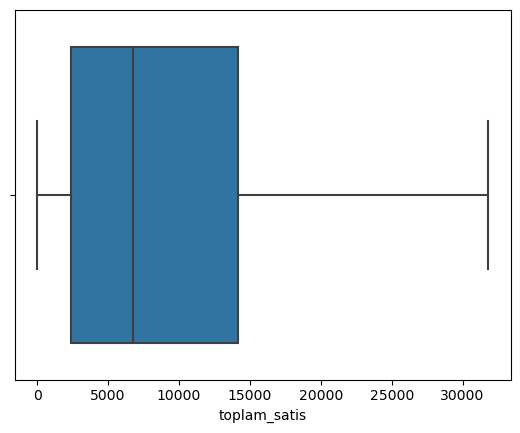

In [97]:
sns.boxplot(data=sales_df_cleaned, x='toplam_satis')
plt.show() 

Merged Data

In [98]:
merged_df = pd.merge(sales_df_cleaned, customer_df, on='musteri_id', how='left')

In [99]:
merged_df.to_csv('merged_data.csv', index=False)
merged_df.head()

,Unnamed: 0,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis,musteri_id,isim,cinsiyet,yas,sehir,harcama_miktari
0,0,2023-07-02,P032,Mouse,Elektronik,1207.30,13,15694.9000,9225,Masume,Kadın,35,İstanbul,3588.15
1,1,2024-02-11,P011,Kalem,Kırtasiye,237.14,16,3794.2400,3955,Fenni,Kadın,64,Konya,3742.46
2,2,2023-03-06,P024,Bilgisayar,Elektronik,1024.29,9,9218.6100,2367,Feyruz,Kadın,45,Bursa,197.55
3,3,2024-04-11,P063,Klima,Elektronik,1477.88,9,31811.4525,2869,Ülke,Kadın,43,İstanbul,3662.18
4,4,2024-01-08,P063,Klima,Elektronik,949.43,19,18039.1700,9724,Tonguç,Erkek,41,Bursa,2536.20


Zaman Serisi Analizi

In [100]:
unique_products = sales_df_cleaned['ürün_adi'].unique()
print("Veri setinde bulunan farklı ürünler:", unique_products)

Veri setinde bulunan farklı ürünler: ['Mouse' 'Kalem' 'Bilgisayar' 'Klima' 'Fırın' 'Defter' 'Çanta' 'Su Şişesi'
 'Kulaklık' 'Telefon']


In [101]:
print(sales_df_cleaned.columns)

Index(['Unnamed: 0', 'tarih', 'ürün_kodu', 'ürün_adi', 'kategori', 'fiyat',
       'adet', 'toplam_satis', 'musteri_id'],
      dtype='object')


In [102]:
# tarih sütununu datetime formatına dönüştürdüm.
sales_df_cleaned['tarih'] = pd.to_datetime(sales_df_cleaned['tarih'], errors='coerce')
print(sales_df_cleaned['tarih'].dtype)

datetime64[ns]


C:\Users\selva\AppData\Local\Temp\ipykernel_19796\645410484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df_cleaned['tarih'] = pd.to_datetime(sales_df_cleaned['tarih'], errors='coerce')


In [103]:
# Başlangıç ve bitiş tarihlerini görmek için: 
start_date = sales_df_cleaned['tarih'].min()
end_date = sales_df_cleaned['tarih'].max()

print(f"Başlangıç Tarihi: {start_date}")
print(f"Bitiş Tarihi: {end_date}")

Başlangıç Tarihi: 2022-11-06 00:00:00
Bitiş Tarihi: 2024-11-05 00:00:00


Haftalık Veri OLuşturma

In [104]:
weekly_sales = sales_df_cleaned.resample('W-Mon', on='tarih')['toplam_satis'].sum() # Haftalık periyot: Pazartesi başlangıçlı
# print("Haftalık Toplam Satış Trendi:\n", weekly_sales.head(50))

# Binlik ayırıcı ile formatladım.
formatted_weekly_sales = weekly_sales.apply(lambda x: f"{x:,.2f}")
print("Haftalık Toplam Satış Trendi:\n", formatted_weekly_sales.head())

Haftalık Toplam Satış Trendi:
 tarih
2022-11-07    118,736.76
2022-11-14    353,109.72
2022-11-21    413,939.36
2022-11-28    415,999.04
2022-12-05    437,452.64
Freq: W-MON, Name: toplam_satis, dtype: object


Belirli Haftalarda Pik Değerler ve Düşüşler

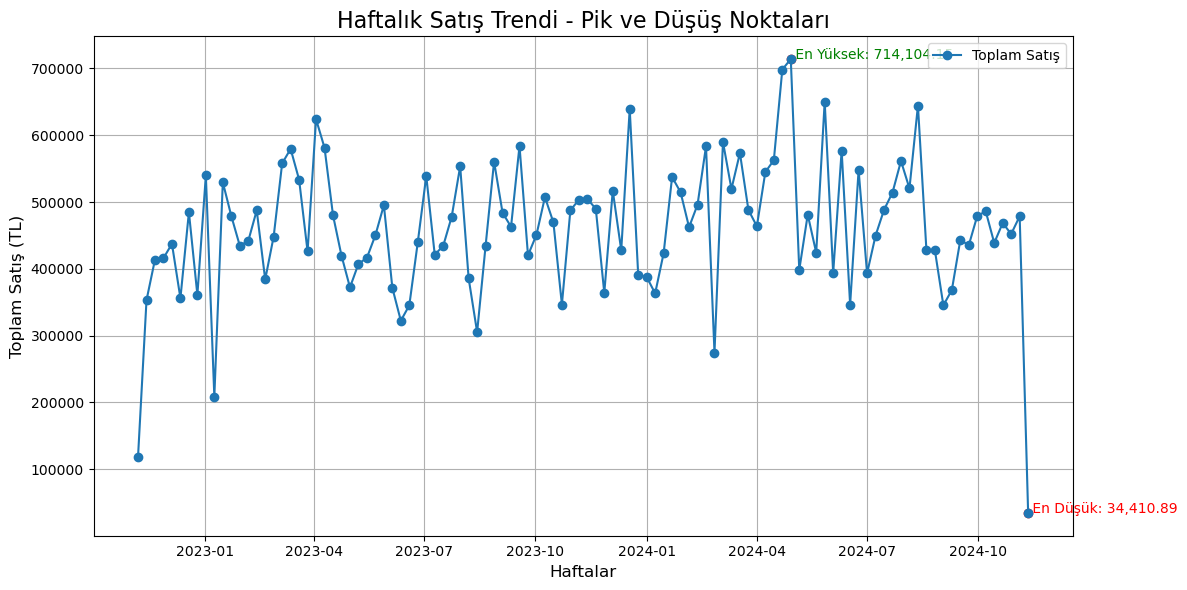

In [105]:
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales.index, weekly_sales.values, marker='o', linestyle='-', label="Toplam Satış")

# Pik noktaları etiketleme
max_week = weekly_sales.idxmax()
min_week = weekly_sales.idxmin()
plt.scatter([max_week, min_week], [weekly_sales.max(), weekly_sales.min()], color='red')
plt.text(max_week, weekly_sales.max(), f" En Yüksek: {weekly_sales.max():,.2f}", fontsize=10, color='green')
plt.text(min_week, weekly_sales.min(), f" En Düşük: {weekly_sales.min():,.2f}", fontsize=10, color='red')

plt.title("Haftalık Satış Trendi - Pik ve Düşüş Noktaları", fontsize=16)
plt.xlabel("Haftalar", fontsize=12)
plt.ylabel("Toplam Satış (TL)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Hareketli Ortalama ile Trend:
Kısa vadeli dalgalanmaları yumuşatmak için hareketli ortalamaları kullanarak uzun vadeli trendleri analiz ettim

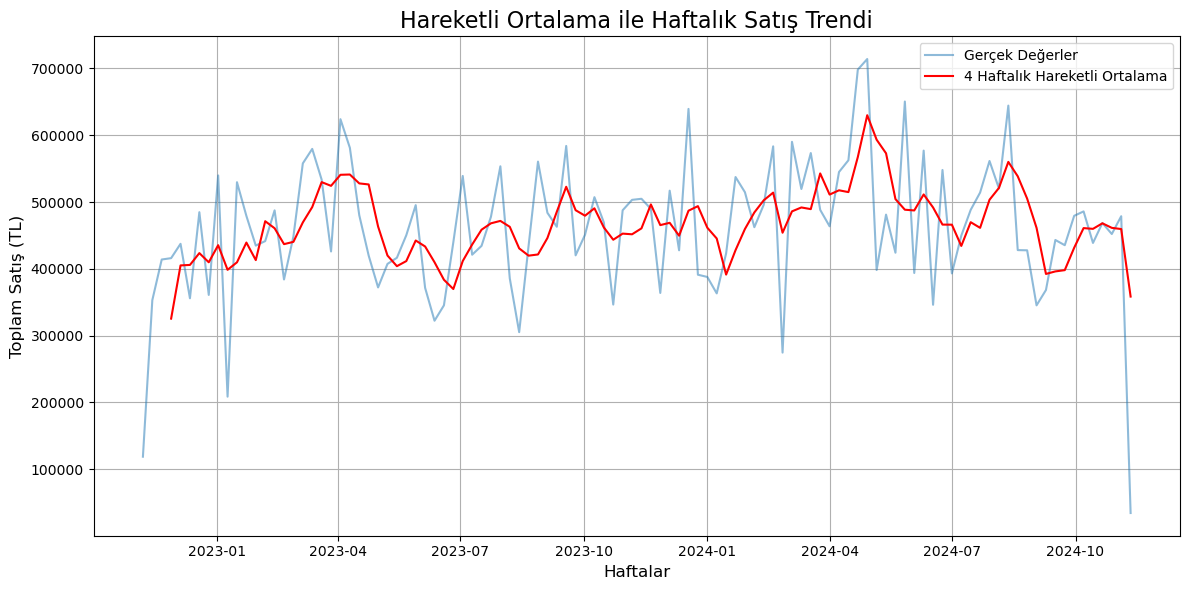

In [106]:
weekly_sales_smoothed = weekly_sales.rolling(window=4).mean()

plt.figure(figsize=(12, 6))
plt.plot(weekly_sales.index, weekly_sales.values, alpha=0.5, label='Gerçek Değerler')
plt.plot(weekly_sales.index, weekly_sales_smoothed, color='red', label='4 Haftalık Hareketli Ortalama')
plt.title("Hareketli Ortalama ile Haftalık Satış Trendi", fontsize=16)
plt.xlabel("Haftalar", fontsize=12)
plt.ylabel("Toplam Satış (TL)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Kategorilere göre gruplama ve haftalık satışların hesaplanması
- NaN değerleri 0 ile dolduralım (eğer bir kategoride o hafta satış yapılmamışsa)

In [107]:
weekly_category_trends = sales_df_cleaned.groupby(['kategori', pd.Grouper(key='tarih', freq='W-Mon')])['toplam_satis'].sum().unstack('kategori')

weekly_category_trends = weekly_category_trends.fillna(0)
print("Haftalık Kategori Satış Trendleri:\n", weekly_category_trends.head())

Haftalık Kategori Satış Trendleri:
 kategori     Elektronik  Ev Aletleri       Giyim   Kırtasiye  Mutfak Ürünleri
tarih                                                                        
2022-11-07   68054.4825        0.000  40768.7025    7597.080          2316.49
2022-11-14  157220.2200    15637.650  57904.8600  113385.155          8961.83
2022-11-21  248050.3150    36906.730  37766.1725   65372.100         25844.04
2022-11-28  193740.1550   104456.365  19934.5600   50255.870         47612.09
2022-12-05  273758.2675    12008.280  23002.7400   80369.320         48314.03


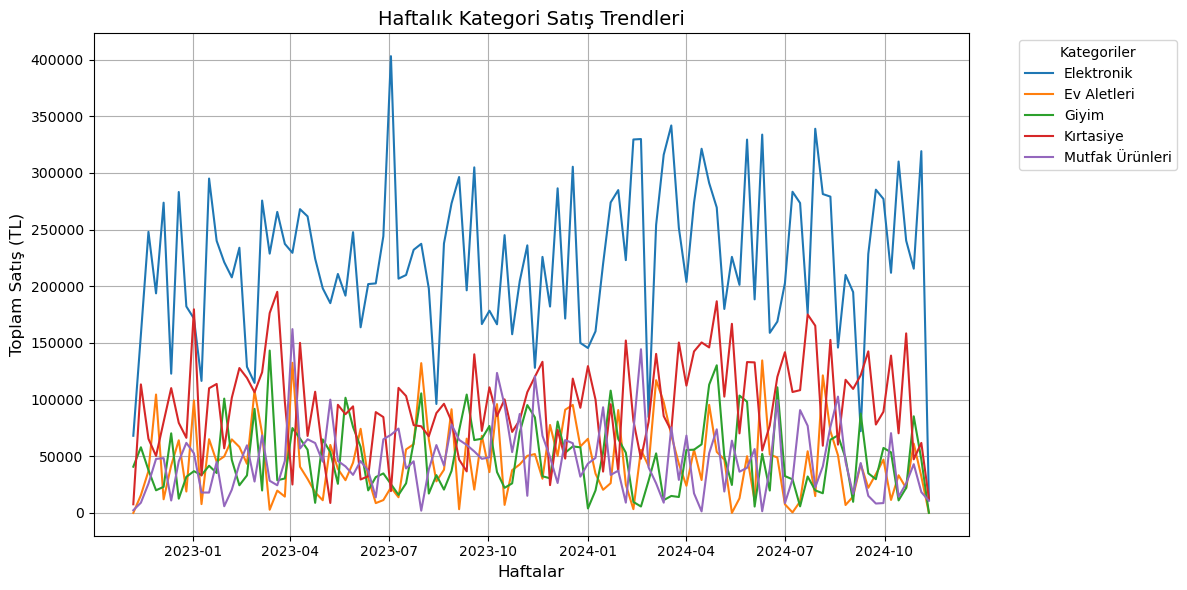

In [108]:
plt.figure(figsize=(12, 6))

for kategori in weekly_category_trends.columns:
    plt.plot(weekly_category_trends.index, weekly_category_trends[kategori], label=kategori)

plt.title("Haftalık Kategori Satış Trendleri", fontsize=14)
plt.xlabel("Haftalar", fontsize=12)
plt.ylabel("Toplam Satış (TL)", fontsize=12)
plt.legend(title="Kategoriler", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [109]:
top_3_categories = weekly_category_trends.sum().nlargest(3).index
print(top_3_categories)

weekly_category_trends.sum()

Index(['Elektronik', 'Kırtasiye', 'Giyim'], dtype='object', name='kategori')


kategori
Elektronik         2.371065e+07
Ev Aletleri        4.822480e+06
Giyim              5.081890e+06
Kırtasiye          1.014048e+07
Mutfak Ürünleri    4.999007e+06
dtype: float64

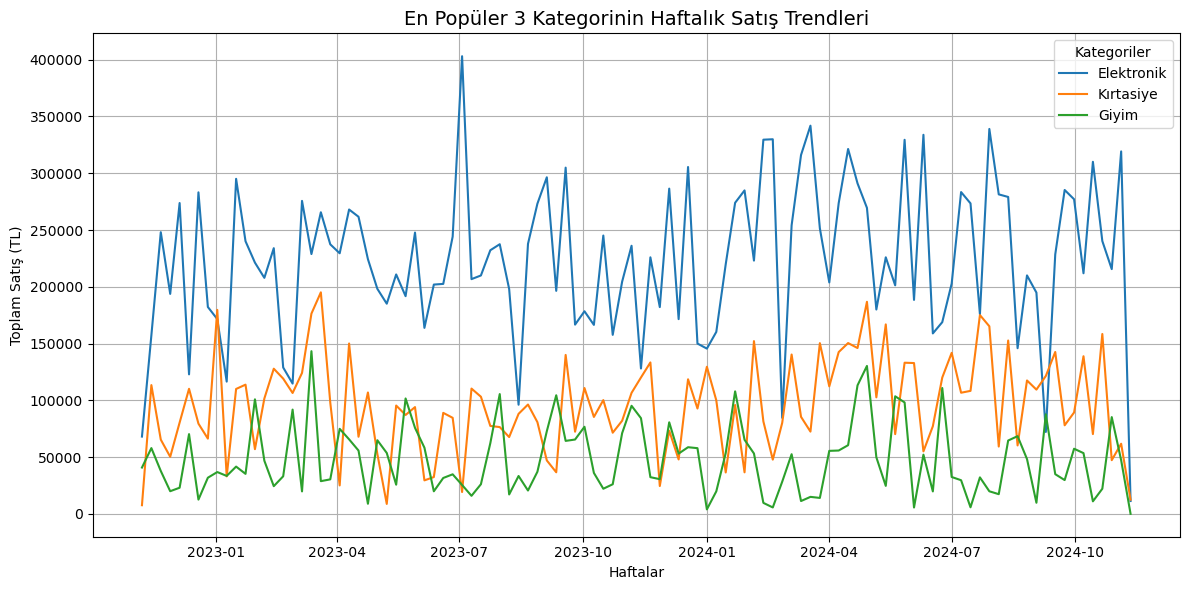

In [110]:
# En popüler 3 kategori
top_3_categories = weekly_category_trends.sum().nlargest(3).index

plt.figure(figsize=(12, 6))
for kategori in top_3_categories:
    plt.plot(weekly_category_trends.index, weekly_category_trends[kategori], label=kategori)

plt.title("En Popüler 3 Kategorinin Haftalık Satış Trendleri", fontsize=14)
plt.xlabel("Haftalar")
plt.ylabel("Toplam Satış (TL)")
plt.legend(title="Kategoriler")
plt.grid()
plt.tight_layout()
plt.show()

In [111]:
# haftalik_urun_satis = sales_df_cleaned.groupby(['ürün_adi']).resample('W', on='tarih')['toplam_satis'].sum().unstack()
# # print("\nHaftalık Ürün Bazında Satış Trendi:\n", haftalik_urun_satis.head(10))

# # Haftalık ürün bazında satışları binlik ayırcaı ile formatladım.
# formatted_haftalik_urun_satis = haftalik_urun_satis.applymap(lambda x: f"{x:,.2f}")
# print("\nHaftalık Ürün Bazında Satış Trendi:\n", formatted_haftalik_urun_satis.head())

In [112]:
# # Kategoriye göre ürün satışlarını grupladım
# haftalik_kategori_urun_satis = sales_df_cleaned.groupby(['kategori', 'ürün_adi']).resample('W', on='tarih')['toplam_satis'].sum().unstack()

# # Belirli bir kategori için örnek görselleştirme yaptım.
# kategori = 'Elektronik'
# kategori_urun_satis = haftalik_kategori_urun_satis.loc[kategori]

# plt.figure(figsize=(12, 6))
# for urun in kategori_urun_satis.index:
#     plt.plot(kategori_urun_satis.columns, kategori_urun_satis.loc[urun], label=urun)

# plt.title(f"{kategori} Kategorisi - Haftalık Ürün Satış Trendleri", fontsize=14)
# plt.xlabel("Haftalar", fontsize=12)
# plt.ylabel("Toplam Satış (TL)", fontsize=12)
# plt.legend(title="Ürünler", bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid()
# plt.tight_layout()
# plt.show()

In [113]:
# # Tarih kolonunu datetime formatına çevir
# sales_df_cleaned['tarih'] = pd.to_datetime(sales_df_cleaned['tarih'], errors='coerce')

# # NaT değerlerini temizle
# sales_df_cleaned = sales_df_cleaned.dropna(subset=['tarih'])

# # Tarih kolonunu index olarak ayarla
# sales_df_cleaned.set_index('tarih', inplace=True)

# # Kategori ve ürün bazında haftalık satışlar
# haftalik_kategori_urun_satis = sales_df_cleaned.groupby(['kategori', 'ürün_adi']).resample('W')['toplam_satis'].sum().unstack(level=-1)

# # 'Elektronik' kategorisi için veriyi filtrele
# kategori = 'Elektronik'
# kategori_urun_satis = haftalik_kategori_urun_satis.loc[kategori]

# # En çok satış yapan 3 ürünü bulma
# top_3_urunler = kategori_urun_satis.sum(axis=1).nlargest(3).index

# # Grafiği oluşturma
# plt.figure(figsize=(12, 6))
# for urun in top_3_urunler:
#     plt.plot(kategori_urun_satis.index, kategori_urun_satis[urun], label=urun)

# plt.title(f"{kategori} Kategorisi - En Popüler 3 Ürün Haftalık Satış Trendleri", fontsize=14)
# plt.xlabel("Haftalar", fontsize=12)
# plt.ylabel("Toplam Satış (TL)", fontsize=12)
# plt.legend(title="Ürünler", loc='upper left')
# plt.grid()
# plt.tight_layout()
# plt.show()


In [114]:
# # Tarih kolonunu datetime formatına çevir
# sales_df_cleaned['tarih'] = pd.to_datetime(sales_df_cleaned['tarih'], errors='coerce')

# # NaT değerlerini temizle
# sales_df_cleaned = sales_df_cleaned.dropna(subset=['tarih'])

# sales_df_cleaned.set_index('tarih', inplace=True)

# haftalik_kategori_urun_satis = sales_df.groupby(['kategori', 'ürün_adi']).resample('W')['toplam_satis'].sum().unstack()

# kategori = 'Elektronik'
# kategori_urun_satis = haftalik_kategori_urun_satis.loc[kategori]

# # En çok satış yapan 3 ürünü bulma
# top_3_urunler = kategori_urun_satis.sum(axis=1).nlargest(3).index

# plt.figure(figsize=(12, 6))
# for urun in top_3_urunler:
#     plt.plot(kategori_urun_satis.columns, kategori_urun_satis.loc[urun], label=urun)

# plt.title(f"{kategori} Kategorisi - En Popüler 3 Ürün Haftalık Satış Trendleri", fontsize=14)
# plt.xlabel("Haftalar", fontsize=12)
# plt.ylabel("Toplam Satış (TL)", fontsize=12)
# plt.legend(title="Ürünler", loc='upper left')
# plt.grid()
# plt.tight_layout()
# plt.show()

In [115]:
# haftalik_kategori_urun_satis = sales_df.groupby(['kategori', 'ürün_adi']).resample('W', on='tarih')['toplam_satis'].sum().unstack()

# kategori = 'Giyim'
# kategori_urun_satis = haftalik_kategori_urun_satis.loc[kategori]

# plt.figure(figsize=(12, 6))
# for urun in kategori_urun_satis.index:
#     plt.plot(kategori_urun_satis.columns, kategori_urun_satis.loc[urun], label=urun)

# plt.title(f"{kategori} Kategorisi - Haftalık Ürün Satış Trendleri", fontsize=14)
# plt.xlabel("Haftalar", fontsize=12)
# plt.ylabel("Toplam Satış (TL)", fontsize=12)
# plt.legend(title="Ürünler", bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid()
# plt.tight_layout()
# plt.show()

Aylık Veri Oluşturma

In [116]:
sales_df_cleaned.set_index('tarih', inplace=True)

aylik_toplam_satis = sales_df_cleaned.resample('M')['toplam_satis'].sum()

formatted_aylik_toplam_satis = aylik_toplam_satis.apply(lambda x: f"{x:,.2f}")

print("Aylık Toplam Satış Trendi:\n", formatted_aylik_toplam_satis)

Aylık Toplam Satış Trendi:
 tarih
2022-11-30    1,432,279.49
2022-12-31    1,919,247.00
2023-01-31    1,858,445.85
2023-02-28    1,778,369.28
2023-03-31    2,288,592.65
2023-04-30    2,095,518.48
2023-05-31    2,006,976.43
2023-06-30    1,540,901.13
2023-07-31    2,223,520.52
2023-08-31    1,814,981.33
2023-09-30    2,194,125.66
2023-10-31    1,979,128.78
2023-11-30    2,042,175.47
2023-12-31    2,043,468.78
2024-01-31    2,060,224.38
2024-02-29    1,837,803.67
2024-03-31    2,358,783.21
2024-04-30    2,614,832.08
2024-05-31    2,202,515.62
2024-06-30    1,956,356.81
2024-07-31    2,224,213.29
2024-08-31    2,060,504.20
2024-09-30    1,862,917.47
2024-10-31    2,081,383.22
2024-11-30      277,246.96
Freq: M, Name: toplam_satis, dtype: object


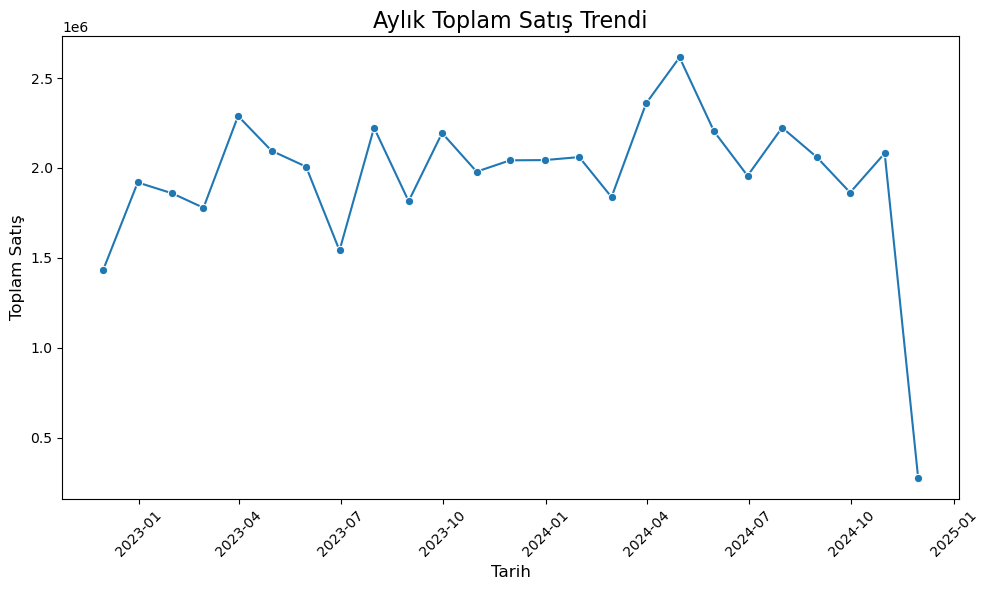

In [117]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=aylik_toplam_satis.index, y=aylik_toplam_satis.values, marker='o')

plt.title("Aylık Toplam Satış Trendi", fontsize=16)
plt.xlabel("Tarih", fontsize=12)
plt.ylabel("Toplam Satış", fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [118]:
aylik_urun_satis = sales_df_cleaned.groupby(['ürün_kodu']).resample('M')['toplam_satis'].sum().unstack()

formatted_aylik_urun_satis = aylik_urun_satis.applymap(lambda x: f"{x:,.2f}")

print("\nAylık Ürün Bazında Satış Trendi:\n", formatted_aylik_urun_satis.head())


Aylık Ürün Bazında Satış Trendi:
 tarih      2022-11-30  2022-12-31  2023-01-31  2023-02-28  2023-03-31  \
ürün_kodu                                                               
P010       160,202.84  166,081.19  215,531.53  196,012.12  265,237.30   
P011        68,984.79  189,011.59  262,612.39  307,122.68  353,528.57   
P018       194,161.18  212,359.97  202,816.41  172,479.15  143,233.66   
P024       165,646.48  127,810.45  224,041.75   85,613.86  280,101.36   
P032       141,691.40  210,459.62  249,706.61  206,093.03  156,989.96   

tarih      2023-04-30  2023-05-31  2023-06-30  2023-07-31  2023-08-31  ...  \
ürün_kodu                                                              ...   
P010       211,152.02  307,524.16  109,444.67  235,133.96  154,469.85  ...   
P011       192,180.61  129,210.47   72,614.24  183,015.64  112,215.31  ...   
P018       198,219.67  174,081.65  241,731.45  278,026.43  212,913.55  ...   
P024       214,112.77  168,099.79  220,710.24  206,818.79  227,

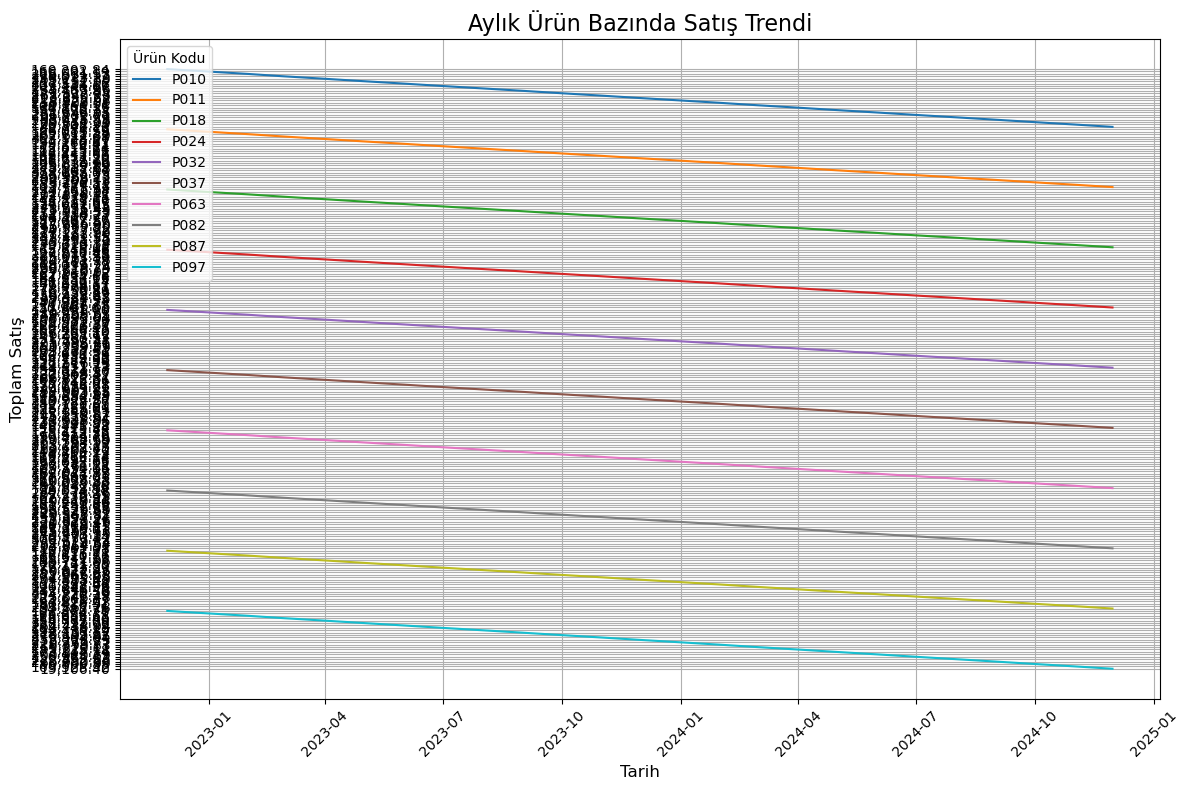

In [119]:
plt.figure(figsize=(12, 8))

for urun_kodu in formatted_aylik_urun_satis.index:
    sns.lineplot(x=formatted_aylik_urun_satis.columns, 
                 y=formatted_aylik_urun_satis.loc[urun_kodu], 
                 label=urun_kodu)


plt.title("Aylık Ürün Bazında Satış Trendi", fontsize=16)
plt.xlabel("Tarih", fontsize=12)
plt.ylabel("Toplam Satış", fontsize=12)

plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()

plt.legend(title="Ürün Kodu", loc='upper left')
plt.show()

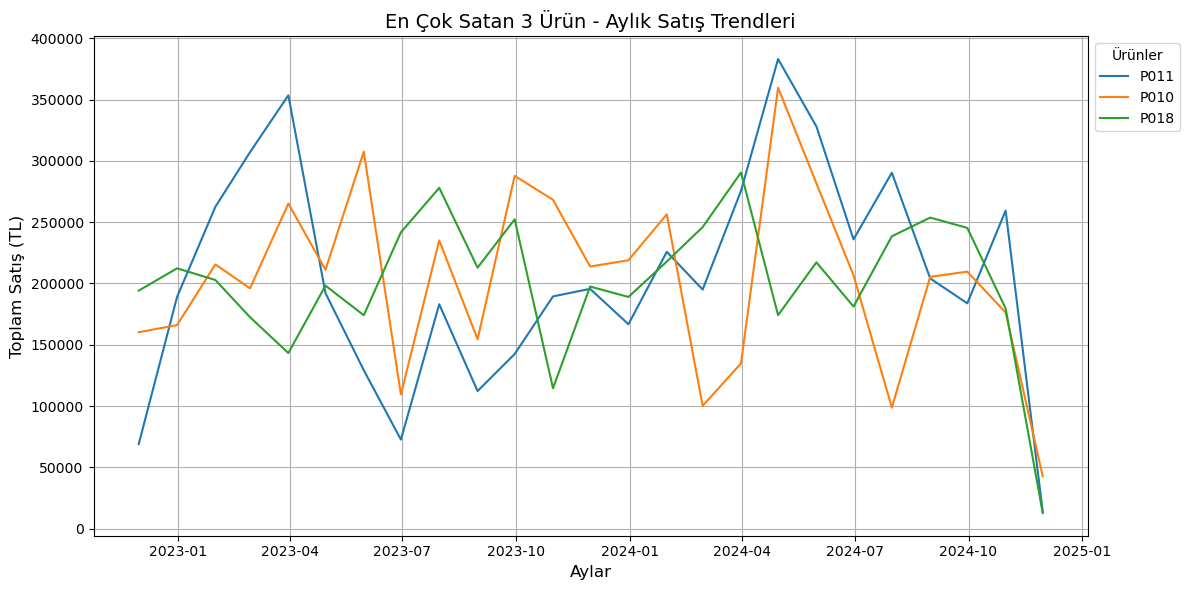

In [120]:
top_3_urunler = aylik_urun_satis.sum(axis=1).nlargest(3).index
top_3_urun_satis = aylik_urun_satis.loc[top_3_urunler]

plt.figure(figsize=(12, 6))

for urun in top_3_urun_satis.index:
    plt.plot(top_3_urun_satis.columns, top_3_urun_satis.loc[urun], label=urun)

plt.title("En Çok Satan 3 Ürün - Aylık Satış Trendleri", fontsize=14)
plt.xlabel("Aylar", fontsize=12)
plt.ylabel("Toplam Satış (TL)", fontsize=12)
plt.legend(title="Ürünler", loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()
plt.tight_layout()
plt.show()

In [121]:
sales_df_cleaned.reset_index(inplace=True)  # Tarih kolonu tekrar DataFrame'de olacak

monthly_sales = sales_df_cleaned.groupby(pd.Grouper(key='tarih', freq='M')).agg(
    first_sale=('tarih', 'min'),
    last_sale=('tarih', 'max')
).reset_index()


print(monthly_sales)

        tarih first_sale  last_sale
0  2022-11-30 2022-11-06 2022-11-30
1  2022-12-31 2022-12-01 2022-12-31
2  2023-01-31 2023-01-01 2023-01-31
3  2023-02-28 2023-02-01 2023-02-28
4  2023-03-31 2023-03-01 2023-03-31
5  2023-04-30 2023-04-01 2023-04-30
6  2023-05-31 2023-05-01 2023-05-31
7  2023-06-30 2023-06-01 2023-06-30
8  2023-07-31 2023-07-01 2023-07-31
9  2023-08-31 2023-08-01 2023-08-31
10 2023-09-30 2023-09-01 2023-09-30
11 2023-10-31 2023-10-01 2023-10-31
12 2023-11-30 2023-11-01 2023-11-30
13 2023-12-31 2023-12-01 2023-12-31
14 2024-01-31 2024-01-01 2024-01-31
15 2024-02-29 2024-02-01 2024-02-29
16 2024-03-31 2024-03-01 2024-03-31
17 2024-04-30 2024-04-01 2024-04-30
18 2024-05-31 2024-05-01 2024-05-31
19 2024-06-30 2024-06-01 2024-06-30
20 2024-07-31 2024-07-01 2024-07-31
21 2024-08-31 2024-08-01 2024-08-31
22 2024-09-30 2024-09-01 2024-09-30
23 2024-10-31 2024-10-01 2024-10-31
24 2024-11-30 2024-11-01 2024-11-05


pd.Grouper kullanarak ay bazında gruplayıp, her ay için ilk ve son satış gününü buldum.

Her hafta satılan toplam ürün miktarını bulmak için:

In [122]:
sales_df['tarih'] = pd.to_datetime(sales_df['tarih'], errors='coerce')

weekly_sales = sales_df_cleaned.groupby(pd.Grouper(key='tarih', freq='W')).agg(
    total_products_sold=('adet', 'sum')
).reset_index()

print(weekly_sales.head())

       tarih  total_products_sold
0 2022-11-06                   57
1 2022-11-13                  428
2 2022-11-20                  442
3 2022-11-27                  458
4 2022-12-04                  518


In [123]:
# En çok ve en az satılan haftalar
max_sales_week = weekly_sales.loc[weekly_sales['total_products_sold'].idxmax()]
min_sales_week = weekly_sales.loc[weekly_sales['total_products_sold'].idxmin()]

print(f"En Çok Satılan Hafta: {max_sales_week}")
print(f"En Az Satılan Hafta: {min_sales_week}")

En Çok Satılan Hafta: tarih                  2024-04-28 00:00:00
total_products_sold                    744
Name: 77, dtype: object
En Az Satılan Hafta: tarih                  2022-11-06 00:00:00
total_products_sold                     57
Name: 0, dtype: object


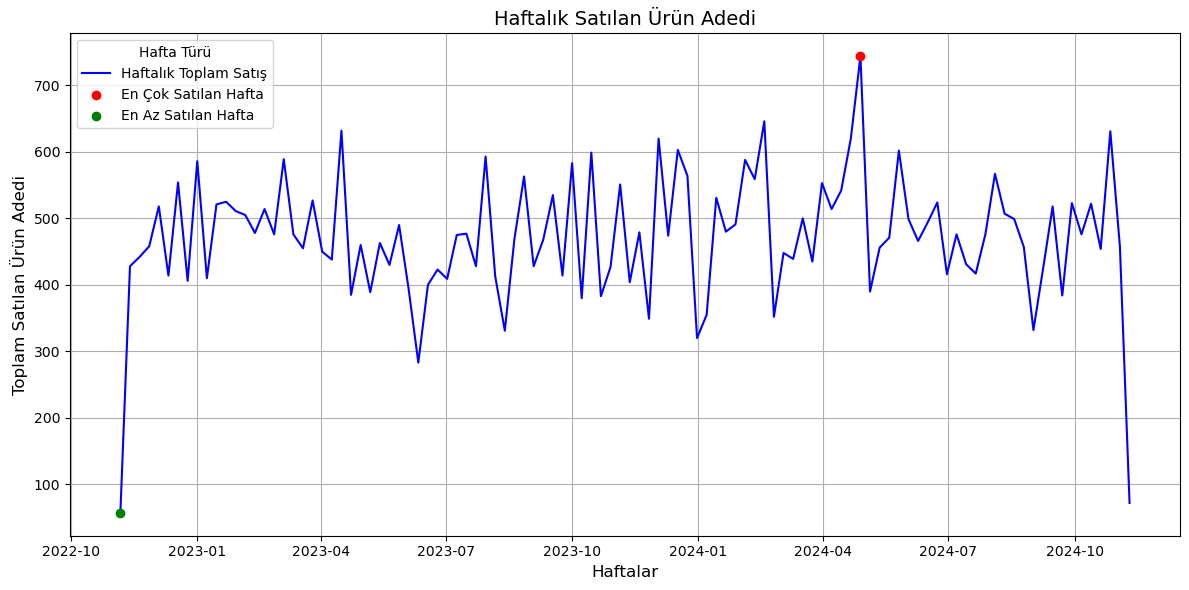

In [124]:
plt.figure(figsize=(12, 6))

plt.plot(weekly_sales['tarih'], weekly_sales['total_products_sold'], label='Haftalık Toplam Satış', color='blue')

plt.scatter(max_sales_week['tarih'], max_sales_week['total_products_sold'], color='red', zorder=5, label='En Çok Satılan Hafta')

plt.scatter(min_sales_week['tarih'], min_sales_week['total_products_sold'], color='green', zorder=5, label='En Az Satılan Hafta')

plt.title("Haftalık Satılan Ürün Adedi", fontsize=14)
plt.xlabel("Haftalar", fontsize=12)
plt.ylabel("Toplam Satılan Ürün Adedi", fontsize=12)
plt.legend(title="Hafta Türü", loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()

Zaman serisindeki trendler:

In [125]:
monthly_sales = sales_df_cleaned.groupby(pd.Grouper(key='tarih', freq='M')).agg(
    total_sales=('toplam_satis', 'sum')
).reset_index()

print(monthly_sales.head())

       tarih   total_sales
0 2022-11-30  1.432279e+06
1 2022-12-31  1.919247e+06
2 2023-01-31  1.858446e+06
3 2023-02-28  1.778369e+06
4 2023-03-31  2.288593e+06


In [126]:
monthly_sales['total_sales'] = pd.to_numeric(monthly_sales['total_sales'], errors='coerce')

monthly_sales['total_sales'] = monthly_sales['total_sales'].fillna(0)

monthly_sales['sales_change'] = monthly_sales['total_sales'].diff()

print(monthly_sales.head(20))

        tarih   total_sales  sales_change
0  2022-11-30  1.432279e+06           NaN
1  2022-12-31  1.919247e+06   486967.5125
2  2023-01-31  1.858446e+06   -60801.1475
3  2023-02-28  1.778369e+06   -80076.5725
4  2023-03-31  2.288593e+06   510223.3625
5  2023-04-30  2.095518e+06  -193074.1650
6  2023-05-31  2.006976e+06   -88542.0550
7  2023-06-30  1.540901e+06  -466075.2975
8  2023-07-31  2.223521e+06   682619.3975
9  2023-08-31  1.814981e+06  -408539.1975
10 2023-09-30  2.194126e+06   379144.3275
11 2023-10-31  1.979129e+06  -214996.8725
12 2023-11-30  2.042175e+06    63046.6900
13 2023-12-31  2.043469e+06     1293.3100
14 2024-01-31  2.060224e+06    16755.5975
15 2024-02-29  1.837804e+06  -222420.7150
16 2024-03-31  2.358783e+06   520979.5425
17 2024-04-30  2.614832e+06   256048.8675
18 2024-05-31  2.202516e+06  -412316.4550
19 2024-06-30  1.956357e+06  -246158.8075


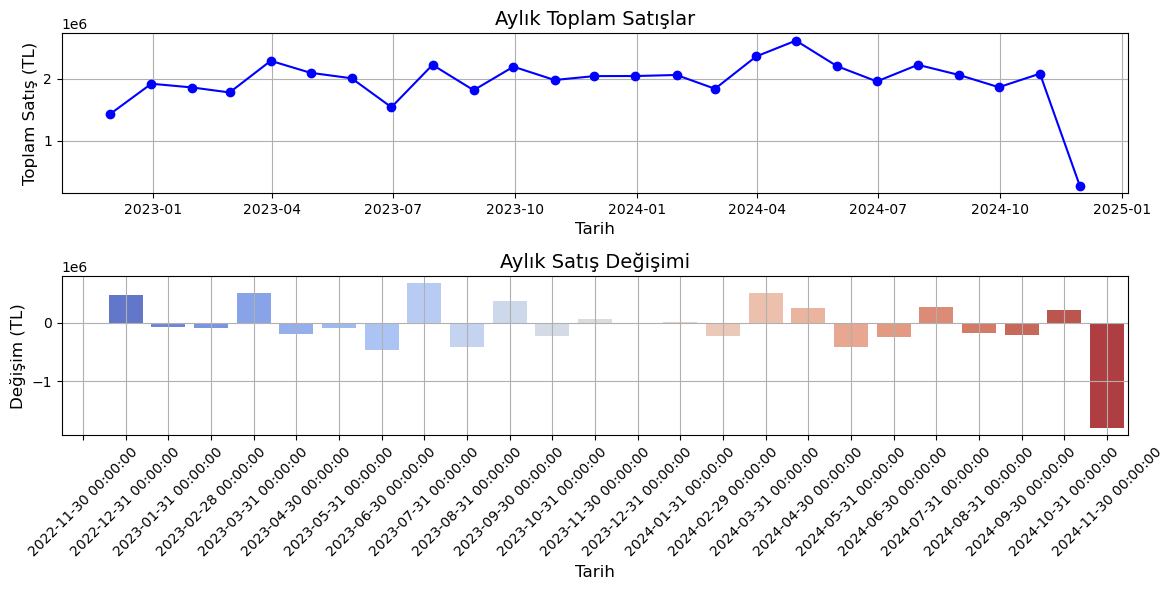

In [127]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1) 
plt.plot(monthly_sales['tarih'], monthly_sales['total_sales'], marker='o', color='b', label='Toplam Satışlar')
plt.title('Aylık Toplam Satışlar', fontsize=14)
plt.xlabel('Tarih', fontsize=12)
plt.ylabel('Toplam Satış (TL)', fontsize=12)
plt.grid(True)

plt.subplot(2, 1, 2)  
sns.barplot(x=monthly_sales['tarih'], y=monthly_sales['sales_change'], palette="coolwarm")
plt.title('Aylık Satış Değişimi', fontsize=14)
plt.xlabel('Tarih', fontsize=12)
plt.ylabel('Değişim (TL)', fontsize=12)
plt.xticks(rotation=45)  
plt.grid(True)

plt.tight_layout()
plt.show()

Mavi: Negatif değişimi (düşüş) ifade eder.
Kırmızı: Pozitif değişimi (artış) ifade eder.

Kategorisel ve Sayısal Analiz

1. Ürün kategorilerine göre toplam satış miktarı ve her kategorinin tüm satışlar içindeki oranı:

In [128]:
category_sales = sales_df_cleaned.groupby('kategori')['toplam_satis'].sum()

total_sales = category_sales.sum()
category_sales_percentage = (category_sales / total_sales) * 100

# Yüzdelik satış oranlarıyla birlikte toplam satışları içeren DataFrame oluşturdum
category_sales_summary = pd.DataFrame({
    'Toplam Satis Miktari': category_sales,
    'Satis Orani (%)': category_sales_percentage
}).reset_index()

print(category_sales_summary)

          kategori  Toplam Satis Miktari  Satis Orani (%)
0       Elektronik          2.371065e+07        48.632731
1      Ev Aletleri          4.822480e+06         9.891352
2            Giyim          5.081890e+06        10.423425
3        Kırtasiye          1.014048e+07        20.799067
4  Mutfak Ürünleri          4.999007e+06        10.253424


Elektronik kategorisi toplam satışların %48.6'sını oluşturuyor.Bu, bu kategorinin toplam satış üzerinde önemli bir paya sahip olduğunu gösteriyor.

Ev Aletleri ve Giyim kategorileri sırasıyla %9.89 ve %10.42'lik paylarla daha düşük oranlarda satış yapıyor.

Kırtasiye ve Mutfak Ürünleri kategorileri de sırasıyla %20.8 ve %10.25 oranlarında katkı sağlıyor.

Bu tablo, satış miktarının büyük kısmının "Elektronik" kategorisinde olduğunu ve her kategorinin toplam satış içindeki yüzdesini göstermektedir

2. Müşterilerin yaş gruplarına göre satış eğilimleri:

In [129]:
age_bins = [18, 25, 35, 50, 100]
age_labels = ['18-25', '26-35', '36-50', '50+']
merged_df['yas_grubu'] = pd.cut(merged_df['yas'], bins=age_bins, labels=age_labels, right=False)

In [130]:
age_group_sales = merged_df.groupby('yas_grubu')['toplam_satis'].sum()

In [131]:
total_sales = age_group_sales.sum()
age_group_sales_percentage = (age_group_sales / total_sales) * 100

Toplam Satış Oranı: Her yaş grubunun toplam satışlar içindeki yüzdesini bulun.

In [132]:
age_group_sales_summary = pd.DataFrame({
    'Toplam Satis Miktari': age_group_sales,
    'Satis Orani (%)': age_group_sales_percentage
}).reset_index()
print(age_group_sales_summary)

  yas_grubu  Toplam Satis Miktari  Satis Orani (%)
0     18-25          6.685222e+06        13.712006
1     26-35          9.143994e+06        18.755176
2     36-50          1.473254e+07        30.217802
3       50+          1.819275e+07        37.315016


3. Kadın ve erkek müşterilerin harcama miktarları ve harcama davranışları arasındaki farkı 

In [133]:
cinsiyet_sayisi = merged_df['cinsiyet'].value_counts()
print(cinsiyet_sayisi)

cinsiyet
Kadın    2510
Erkek    2448
Name: count, dtype: int64


In [134]:
cinsiyet_harcama = merged_df.groupby('cinsiyet')['harcama_miktari'].sum()

In [135]:
ortalama_harcama = merged_df.groupby('cinsiyet')['harcama_miktari'].median()

In [136]:
cinsiyet_karsilastirma = pd.DataFrame({
    'Toplam Harcama': cinsiyet_harcama,
    'Ortalama Harcama': ortalama_harcama
}).reset_index()
print(cinsiyet_karsilastirma)

  cinsiyet  Toplam Harcama  Ortalama Harcama
0    Erkek      6296472.35           2559.87
1    Kadın      6555533.80           2589.07


- Kadınların toplam harcaması, erkeklere kıyasla daha yüksektir. Bu, kadınların toplamda daha fazla harcama yaptığına işaret eder.
- Kadınlar toplamda daha fazla harcama yapmış, bu farkın büyük bir kısmı kadın sayısının erkeklerden fazla olmasıdır.
- Ortalama harcama değerlerine baktığımızda, kadınların başına düşen harcama erkeklere göre biraz daha yüksek. Ancak bu fark, oldukça küçüktür ve sadece 29,2 TL'lik bir fark vardır.

#
İleri Düzey Veri Manipülasyonu

1. Müşterilerin şehir bazında toplam harcama miktarı


In [137]:
unique_sehir_count = merged_df['sehir'].nunique()
print("Benzersiz şehir sayısı:", unique_sehir_count)

Benzersiz şehir sayısı: 8


In [138]:
sehir_harcama = merged_df.groupby('sehir')['toplam_satis'].sum().reset_index()

sehir_harcama_sorted = sehir_harcama.sort_values(by='toplam_satis', ascending=False)

print(sehir_harcama_sorted)

       sehir  toplam_satis
7      İzmir  6.531063e+06
4  Gaziantep  6.318590e+06
3      Bursa  6.238037e+06
0      Adana  6.065518e+06
2    Antalya  5.940534e+06
5      Konya  5.922714e+06
6   İstanbul  5.887112e+06
1     Ankara  5.850943e+06


In [139]:
musteri_harcama = merged_df.groupby('musteri_id')['toplam_satis'].sum().reset_index()

# Şehirlere göre toplam harcama hesapladım ve her şehirdeki en çok harcama yapan müşteriyi buldum
sehir_harcama_musteri = merged_df.groupby(['sehir', 'musteri_id'])['toplam_satis'].sum().reset_index()

# Her şehirdeki en çok harcama yapan müşteriyi bulmak için her şehir için maksimum harcamayı seçtim
en_cok_harcama_yapan = sehir_harcama_musteri.loc[sehir_harcama_musteri.groupby('sehir')['toplam_satis'].idxmax()]

# Şehirlere göre sıralama yaptım (en çok harcama yapan müşteri bazında)
en_cok_harcama_yapan_sorted = en_cok_harcama_yapan.sort_values(by='toplam_satis', ascending=False)

print(en_cok_harcama_yapan_sorted)

          sehir  musteri_id  toplam_satis
282       Adana        7380   100714.2250
1319      Bursa        4365    98225.6250
1965      Konya        1150    77655.7250
587      Ankara        5420    77124.8150
2540   İstanbul        5331    75554.2125
2926      İzmir        5245    74495.1650
1052    Antalya        7346    66120.3050
1901  Gaziantep        8939    65237.6025


Şehirlerin sıralamasını, en çok harcama yapan müşterilere göre görebiliriz.

Bölgesel Farklar: Adana, Bursa ve Konya gibi şehirlerde daha büyük harcamalar gözlemleniyor. Bu durum, bu şehirlerdeki belirli müşteri segmentlerinin veya ekonomik faaliyetlerin farklı olduğuna işaret edebilir. Bu şehirlerdeki yüksek harcamalar, belirli bir müşteri kitlesinin güçlü alım gücünü gösterebilir.

Büyük Şehirlerin Durumu: İstanbul, İzmir, Antalya ve Ankara gibi büyük şehirlerdeki en yüksek harcama rakamları daha düşük. Bu şehirlerde genellikle daha fazla müşteri bulunduğu için, en yüksek harcama yapan müşteri sayılarının daha geniş bir gruptan geldiği düşünülebilir. Bu da, şehirdeki yoğunluk nedeniyle en fazla harcama yapan müşteri tutarlarının daha düşük olmasını açıklayabilir.

2. Satış verisinde her bir ürün için ortalama satış artışı oranı:

In [140]:
sales_df_cleaned['tarih'] = pd.to_datetime(sales_df_cleaned['tarih'])

sales_df_cleaned['yil_ay'] = sales_df_cleaned['tarih'].dt.to_period('M')

# Ürün ve ay bazında toplam satış adedini hesapladım.
urun_aylik_satis = sales_df_cleaned.groupby(['ürün_kodu', 'yil_ay'])['adet'].sum().reset_index()

# Satış değişim yüzdesini hesapladım. (önceki aya göre değişim)
urun_aylik_satis['satis_degisimi'] = urun_aylik_satis.groupby('ürün_kodu')['adet'].pct_change() * 100

# Ortalama satış artışı oranını her ürün için hesapladım.
ortalama_satis_artisi = urun_aylik_satis.groupby('ürün_kodu')['satis_degisimi'].mean().reset_index()

print(ortalama_satis_artisi.head())

  ürün_kodu  satis_degisimi
0      P010        4.343655
1      P011       12.208059
2      P018       -1.770645
3      P024       15.838055
4      P032        4.127789


C:\Users\selva\AppData\Local\Temp\ipykernel_19796\1077425159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df_cleaned['tarih'] = pd.to_datetime(sales_df_cleaned['tarih'])
C:\Users\selva\AppData\Local\Temp\ipykernel_19796\1077425159.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df_cleaned['yil_ay'] = sales_df_cleaned['tarih'].dt.to_period('M')


Pandas groupby ile her bir kategorinin aylık toplam satışları

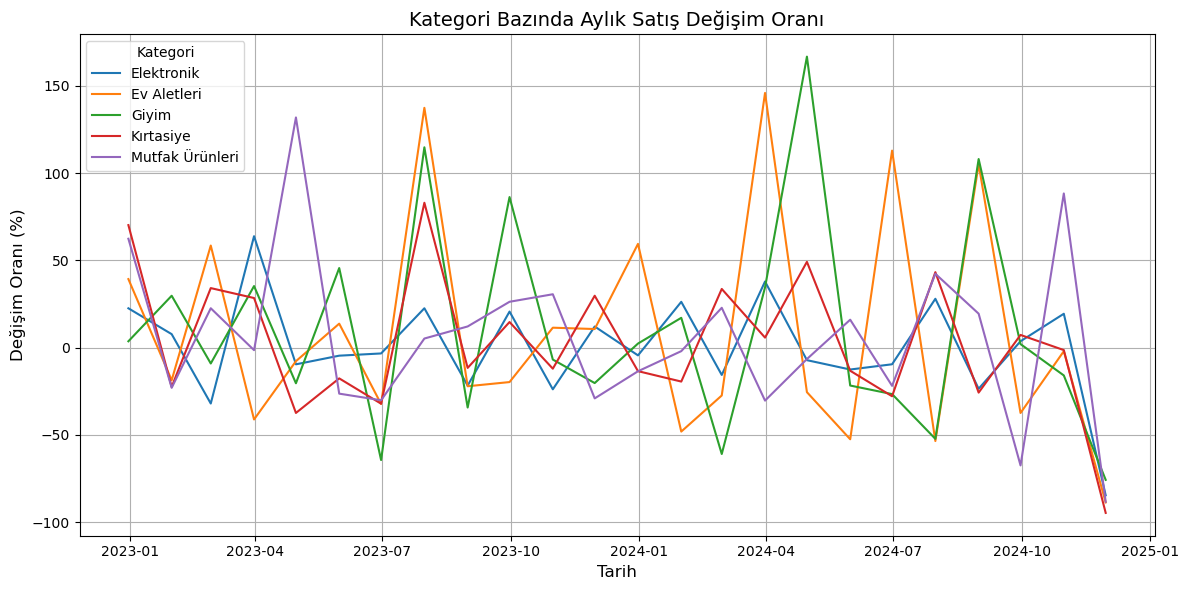

In [141]:
# Aylık toplam satışları hesapladım.
kategori_aylik_satis = sales_df_cleaned.groupby([pd.Grouper(key='tarih', freq='M'), 'kategori'])['toplam_satis'].sum().unstack()

kategori_aylik_satis_change = kategori_aylik_satis.pct_change() * 100  

plt.figure(figsize=(12, 6))

for kategori in kategori_aylik_satis_change.columns:
    plt.plot(kategori_aylik_satis_change.index, kategori_aylik_satis_change[kategori], label=kategori)

plt.title("Kategori Bazında Aylık Satış Değişim Oranı", fontsize=14)
plt.xlabel("Tarih", fontsize=12)
plt.ylabel("Değişim Oranı (%)", fontsize=12)
plt.legend(title="Kategori", loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Cohort Analizi

In [142]:
merged_df['tarih'] = pd.to_datetime(merged_df['tarih'])

merged_df['ilk_satin_alma_tarihi'] = merged_df.groupby('musteri_id')['tarih'].transform('min')

merged_df['cohort_month'] = merged_df['ilk_satin_alma_tarihi'].dt.to_period('M')

merged_df['satın_alma_ay'] = merged_df['tarih'].dt.to_period('M')

print(merged_df[['musteri_id', 'ilk_satin_alma_tarihi', 'cohort_month', 'satın_alma_ay']].head())

   musteri_id ilk_satin_alma_tarihi cohort_month satın_alma_ay
0        9225            2023-07-02      2023-07       2023-07
1        3955            2023-05-13      2023-05       2024-02
2        2367            2023-03-06      2023-03       2023-03
3        2869            2024-04-11      2024-04       2024-04
4        9724            2024-01-08      2024-01       2024-01


In [143]:
merged_df['cohort_index'] = (merged_df['satın_alma_ay'].dt.year - merged_df['cohort_month'].dt.year) * 12 + (merged_df['satın_alma_ay'].dt.month - merged_df['cohort_month'].dt.month) + 1
print(merged_df[['musteri_id', 'cohort_month', 'satın_alma_ay', 'cohort_index']].head())

   musteri_id cohort_month satın_alma_ay  cohort_index
0        9225      2023-07       2023-07             1
1        3955      2023-05       2024-02            10
2        2367      2023-03       2023-03             1
3        2869      2024-04       2024-04             1
4        9724      2024-01       2024-01             1


In [144]:
cohort_data = merged_df.pivot_table(index='cohort_month', columns='cohort_index', values='musteri_id', aggfunc='nunique')
cohort_sizes = cohort_data.iloc[:, 0]

cohort_retention = cohort_data.divide(cohort_sizes, axis=0)

cohort_retention = cohort_retention.fillna(0)

cohort_retention = cohort_retention * 100
print(cohort_retention)

cohort_index     1         2         3         4         5         6   \
cohort_month                                                            
2022-11       100.0  3.289474  5.921053  2.631579  3.289474  5.263158   
2022-12       100.0  3.482587  3.482587  2.985075  3.980100  4.477612   
2023-01       100.0  4.812834  5.347594  4.278075  3.743316  3.208556   
2023-02       100.0  5.232558  2.325581  4.651163  3.488372  4.651163   
2023-03       100.0  3.763441  4.301075  0.537634  5.376344  2.150538   
2023-04       100.0  6.060606  3.030303  4.848485  2.424242  2.424242   
2023-05       100.0  1.324503  6.622517  2.649007  3.973510  2.649007   
2023-06       100.0  4.964539  4.255319  3.546099  6.382979  4.255319   
2023-07       100.0  8.108108  2.702703  4.054054  3.378378  7.432432   
2023-08       100.0  4.761905  3.174603  3.174603  6.349206  1.587302   
2023-09       100.0  3.311258  3.973510  3.973510  4.635762  5.298013   
2023-10       100.0  5.932203  3.389831  5.084746  

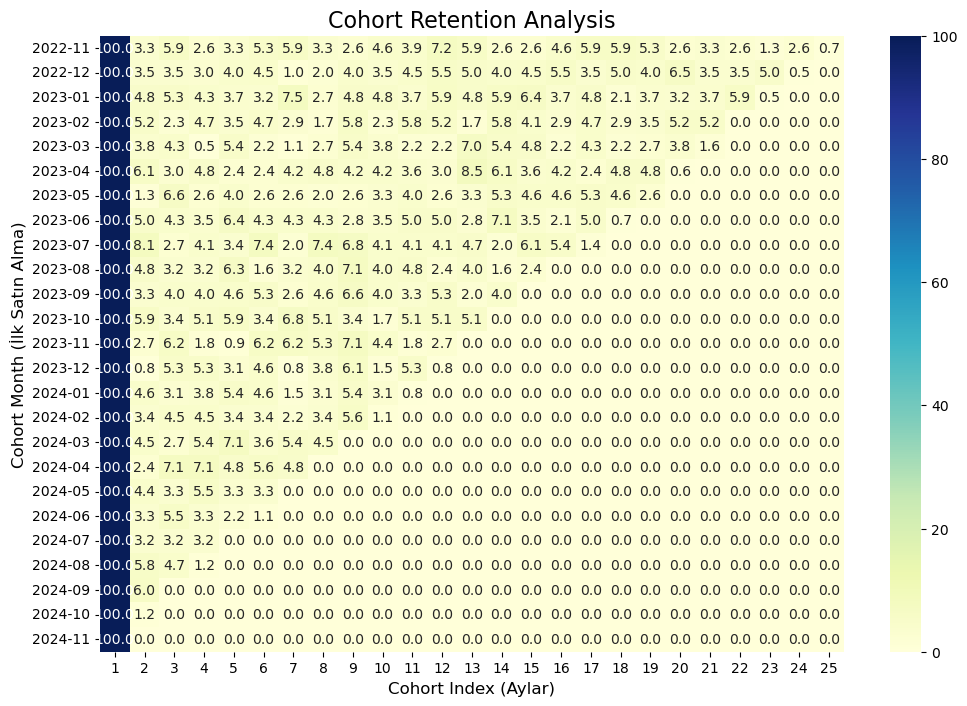

In [145]:
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_retention, annot=True, fmt='.1f', cmap="YlGnBu", cbar=True)
plt.title('Cohort Retention Analysis', fontsize=16)
plt.xlabel('Cohort Index (Aylar)', fontsize=12)
plt.ylabel('Cohort Month (İlk Satın Alma)', fontsize=12)
plt.show()

In [146]:
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958 entries, 0 to 4957
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             4958 non-null   int64         
 1   tarih                  4958 non-null   datetime64[ns]
 2   ürün_kodu              4958 non-null   object        
 3   ürün_adi               4958 non-null   object        
 4   kategori               4958 non-null   object        
 5   fiyat                  4958 non-null   float64       
 6   adet                   4958 non-null   int64         
 7   toplam_satis           4958 non-null   float64       
 8   musteri_id             4958 non-null   int64         
 9   isim                   4958 non-null   object        
 10  cinsiyet               4958 non-null   object        
 11  yas                    4958 non-null   int64         
 12  sehir                  4958 non-null   object        
 13  har

Tahmin Modeli

In [148]:
merged_df['tarih'] = pd.to_datetime(merged_df['tarih'], errors='coerce')
merged_df['ay'] = merged_df['tarih'].dt.month
merged_df['yıl'] = merged_df['tarih'].dt.year
merged_df['Age_Group'] = pd.cut(merged_df['yas'], bins=[0, 18, 35, 50, 100], labels=['0-18', '19-35', '36-50', '50+'])

merged_df = pd.get_dummies(merged_df, columns=['kategori', 'ürün_adi', 'cinsiyet', 'sehir'], drop_first=True)

# Verinin son halini gözlemleyin
print(merged_df.head())

# Model için özellik ve hedef değişkenlerin belirlenmesi
X = merged_df[['yıl', 'ay', 'fiyat', 'adet', 'yas', 'harcama_miktari'] + 
              [col for col in merged_df.columns if 'kategori_' in col or 'ürün_adi_' in col or 'cinsiyet_' in col or 'sehir_' in col]]
y = merged_df['toplam_satis']

   Unnamed: 0      tarih ürün_kodu    fiyat  adet  toplam_satis  musteri_id  \
0           0 2023-07-02      P032  1207.30    13    15694.9000        9225   
1           1 2024-02-11      P011   237.14    16     3794.2400        3955   
2           2 2023-03-06      P024  1024.29     9     9218.6100        2367   
3           3 2024-04-11      P063  1477.88     9    31811.4525        2869   
4           4 2024-01-08      P063   949.43    19    18039.1700        9724   

     isim  yas  harcama_miktari  ... ürün_adi_Telefon ürün_adi_Çanta  \
0  Masume   35          3588.15  ...            False          False   
1   Fenni   64          3742.46  ...            False          False   
2  Feyruz   45           197.55  ...            False          False   
3    Ülke   43          3662.18  ...            False          False   
4  Tonguç   41          2536.20  ...            False          False   

  cinsiyet_Kadın sehir_Ankara  sehir_Antalya  sehir_Bursa  sehir_Gaziantep  \
0           Tr

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [150]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [151]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R^2 Skoru: {r2}')

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

R^2 Skoru: 0.4190305826303832
Mean Squared Error (MSE): 48011459.11181088
